In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [18]:
def plot_dataset(X: np.array, y: np.array) -> None:
    """Create scatter plot for samples from each class"""
    n_classes = len(np.unique(y))
    class_counts = np.unique(y, return_counts=True)[1]
    class_ratios = class_counts = class_counts / len(y)
    for class_value in range(n_classes):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)[0]
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
    # Create title with class ratios
    title = "Class Ratios: " + ", ".join([f"{i}: {ratio:.3f}" for i, ratio in enumerate(class_ratios)])
    plt.title(title, size="x-large", weight="bold", c="b")
    # show a legend
    plt.legend(loc="best")
    # show the plot
    plt.show()

# La Classification Déséquilibrée

> **PLAN**
>
> 1. Plan
> 2. Fondamentaux
> 3. Considérations sur les métriques
> 4. Stratification
> 5. Pondération
> 6. Echantillonnage

# Fondamentaux

## Définition

On parle de *classification déséquilibrée* quand on a un problème de classification pour lequel il y a **une répartition qui n'est pas uniforme/équilibrée des classes de la *target* dans le dataset**.

> **Exemple**
>
> On collecte des caractéristiques de fleurs et on a 80 exemples d'une première espèce et 20 d'une seconde espèce.

## Causes

Cela peut être dû à:

- un **échantillonage biaisé** (recueil des données dans des circonstances particulières, géographiques ou temporelles)
- des **erreurs de mesure ou de saisie** (coquilles ou erreur de report des classes),
- une **prédominance *"naturelle"* d'une ou plusieurs classes** (détection de pathologies, par exemple).

## Terminologie

> **RATIO**
>
> On décrit souvent le déséquilibre à l'aide d'un ratio:
> - $20:80$ dans l'exemple précédent,
> - $1: 99$ dans un exemple encore plus déséquilibré.

> **Types de déséquilibre**
> - <font color="green">**léger**: inférieur à $1:4$ 👉 **Souvent pas un problème**</font>
> - <font color="orange">**important**: entre $1:4$ et $1:100$ compris ☝️ **Peut être challengeant pour le modèle**</font>
> - <font color="tomato">**sévère**: inférieur à $1:100$  ⚠️ **Va requérir des techniques spéciales**</font>

> **Pour les classes** (cas binaire)
>
> On parlera de:
> - classe **majoritaire**, étiquetée $0$
> - classe **minoritaire**, étiquetée $1$

## ☝️ Le Challenge

> 👉 **Souvent, c'est la classe minoritaire qui présente le plus d'intérêt**.
> 
> Or, elle est **plus difficile à prédire**, dans la mesure où **il y a moins d'exemples de cette classe** et que **c'est donc plus challengeant pour le modèle**:
> - **d'apprendre les caractéristiques de cette classe**,
> - **de différencier les exemples de cette classe de ceux de la ou des classes majoritaires**.

## Quelques Cas Réels

- Détection de fraude
- Prédiction de réclamation
- Prédiction de désabonnement
- Détection de spam
- Détection d'anomalie
- Détection d'outlier
- Détection d'intrusion
- Détection de pathologie rare

## Effets Aggravants

- la taille du dataset (*Plus d'exemples est souhaitable*),
- le *"bruit"* parmi les labels,
- la distribution des labels (au sens *clusters*)

# Considérations sur les métriques

## Non-pertinence de l'*accuracy*

## ❌ Diagnostiquer un Modèle / Comparer des modèles

- La *courbe ROC* est un bon **outil de diagnostic individuel de modèle**.
- Le *score AUC* permet de **comparer des modèles**, le score $F_1$ dans une moindre mesure.

```python
# Implémentations
from sklearn.metrics import auc, roc_auc_score, roc_curve
```

## Compromis *Precision/Recall*

### Fréquemment...

Pour ce type de problème, **les erreurs de type II (*Faux Négatif* (FN)) sont pires que les erreurs de type I (*Faux Positif* (FP))**.

### Exemples

> **Prêt Bancaire**
>
> <font color="orange">**Refuser un prêt à un bon client**</font>
>
> VS
>
> <font color="tomato">**Accorder un prêt à un mauvais client qui risque de ne jamais le rembourser**</font>
> <hr/>
>
> **Diagnostic du Cancer**
>
> <font color="orange">**Diagnostiquer un cancer chez un patient en bonne santé et effectuer des tests médicaux supplémentaires**</font>
>
> VS
>
> <font color="tomato">**Laisser partir un patient atteint d'un cancer**</font>
> <hr/>
>
> **Détection de Fraude**
>
> <font color="orange">**Identifier les bonnes demandes d'indemnisation comme frauduleuses et assurer le suivi avec le client**</font>
> 
> VS
> 
> <font color="tomato">**Honorer les demandes d'indemnisation frauduleuses**</font>

👉 On va donc majoritairement chercher à **maximiser le *recall***...

☝️ Mais **à quel prix de précision?**

⚠️ **Un arbitrage sera nécessaire**

## Outils d'arbitrage

### Courbe *Precision/Recall*

```python
# Implémentation
from sklearn.metrics import precision_recall_curve
```

### $F-mesures$

### ❌ $F_1$ Macro et Micro

```python
# Implémentations
from sklearn.metrics import classification_report, f1_score
```

### $F_{\beta}$

On peut utiliser une **version corrigée du $F_1$ score**, afin de **favoriser l'une des deux métriques antagonistes**, en contrôlant l'équilibre de ces mesures à l'aide d'un paramètre $\beta$.

$$\large F_{\beta} = \frac{(1 + \beta^2) \times Precision \times Recall}{\beta^2 \times Precision + Recall}$$

Pour certains problèmes, nous pourrions être intéressés par **un $F_{\beta}$ score accordant plus d'attention à la *précision***, par exemple lorsque
- il est plus important de minimiser les *faux positifs* (FP),
- mais que les *faux négatifs* (FN) restent importants.

Inversement, sur d'autres problèmes, nous pourrions être intéressés par **un $F_{\beta}$ score accordant plus d'attention au *rappel***, par exemple lorsque:
- il est plus important de mémoriser les *faux négatifs* (FN),
- mais que les *faux positifs* (FP) restent importants.

Il y a trois valeurs communes pour le paramètre $\beta$:
- *$F_{0.5}$*: plus de poids sur la *précision*, moins de poids sur le *rappel*,
- *$F_1$*: autant de poids pour les deux métriques,
- *$F_2$*: moins de poids sur la *précision*, plus de poids sur le *rappel*.

```python
from sklearn.metrics import fbeta_score
```

## 🔎 Choisir une métrique d'évaluation

<img src="https://i.ibb.co/b5qqNWM/Choosing-metric.png" alt="Choosing-metric" border="0">

# Stratification

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
# summarize dataset
classes = np.unique(y)
total = len(y)
for c in classes:
	n_examples = len(y[y==c])
	percent = n_examples / total * 100
	print(f'> Class={c} : {n_examples}/{total} {percent:.1f} %')

> Class=0 : 990/1000 99.0 %
> Class=1 : 10/1000 1.0 %


## Du Hold-Out

### Sans Stratification

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=4957, 1=43, Test: 0=4943, 1=57


Avec une classe minoritaire (et un nombre d'exemples assez restreints, le hasard peut contribuer à produire un *train set* et un *test set* différents en termes de répartition de la *target*

### Stratification avec `stratify=y`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5, random_state=2,
                                                    stratify=y)  # <= ONLY CHANGE
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=495, 1=5, Test: 0=495, 1=5


## De la Cross-Validation

### Cross-Validation Classique (avec `KFold`)

In [29]:
from sklearn.model_selection import KFold


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X):
	# select rows
	X_train, X_test = X[train_ix], X[test_ix]
	y_train, y_test = y[train_ix], y[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
	test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
	print(f'>Train: 0={train_0}, 1={train_1}, Test: 0={test_0}, 1={test_1}')

>Train: 0=7915, 1=85, Test: 0=1985, 1=15
>Train: 0=7924, 1=76, Test: 0=1976, 1=24
>Train: 0=7918, 1=82, Test: 0=1982, 1=18
>Train: 0=7920, 1=80, Test: 0=1980, 1=20
>Train: 0=7923, 1=77, Test: 0=1977, 1=23


😱 Malheureusement, le hasard a fait que le *test set* du fold 4 **ne contient AUCUN représentant de la classe minoritaire**.

### Cross-Validation Stratifiée (`StratifiedKFold`)

In [28]:
from sklearn.model_selection import StratifiedKFold


# ⬇️ THE ONLY CHANGE IS THE FOLLOWING LINE
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
	# select rows
	X_train, X_test = X[train_ix], X[test_ix]
	y_train, y_test = y[train_ix], y[test_ix]
	# summarize train and test composition
	train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
	test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
	print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=7920, 1=80, Test: 0=1980, 1=20
>Train: 0=7920, 1=80, Test: 0=1980, 1=20
>Train: 0=7920, 1=80, Test: 0=1980, 1=20
>Train: 0=7920, 1=80, Test: 0=1980, 1=20
>Train: 0=7920, 1=80, Test: 0=1980, 1=20


### ❌ Cross-Validation Répétée et Stratifiée (`RepeatedStratifiedKFold`)

<font color="tomato">**Plus robuste: A EXPLIQUER**</font>

# Pondération

Cette partie met à profit des fonctions de Scikit-Learn permettant de **pondére**:
- **les classes de la *target***
- **chaque observation**

en vue, éventuellement, de limiter leur influence.

In [45]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05],
                           class_sep=2, random_state=42)

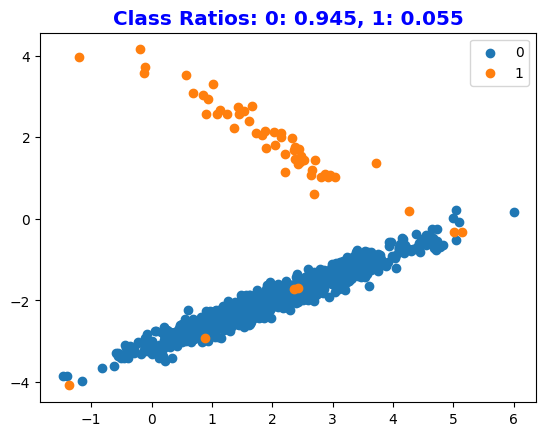

In [46]:
plot_dataset(X, y)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                   )

## Sans pondération

In [65]:
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model,
                         X_train, y_train,
                         scoring="roc_auc",
                         cv=cv,
                         n_jobs=-1)
print(f'Mean ROC AUC on train: {np.mean(scores):.3f}')

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

auc_test = roc_auc_score(y_test, y_probs)
print(f"ROC AUC on test: {auc_test:.3f}")

Mean ROC AUC on train: 0.961
ROC AUC on test: 0.885


## Avec pondération

In [75]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {k: class_weights[k] for k in (0, 1)}

model = LogisticRegression(class_weight=class_weights_dict)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model,
                         X_train, y_train,
                         scoring="roc_auc",
                         cv=cv,
                         n_jobs=-1)
print(f'Mean ROC AUC on train: {np.mean(scores):.3f}')

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

auc_test = roc_auc_score(y_test, y_probs)
print(f"ROC AUC on test: {auc_test:.3f}")

Mean ROC AUC on train: 0.956
ROC AUC on test: 0.806


# Echantillonnage Basique

## Définition

> L'***échantillonnage des données*** (*Data Sampling*) consiste à créer une nouvelle version transformée de l'ensemble de données de formation **dans laquelle les exemples sélectionnés ont une distribution de classe différente**.
> 
> Il s'agit d'une stratégie simple et efficace pour les problèmes de classification déséquilibrée.

## Deux Stratégies

> ⬆️ Le ***suréchantillonnage*** (*Oversampling*) ***aléatoire*** consiste à:
> - **sélectionner au hasard** des exemples de la classe **minoritaire**, **avec remplacement**,
> - à les **ajouter** à l'ensemble de données d'**entraînement**.

> </hr>
> 
> ⬇️ Le ***sous-échantillonnage*** (*Undersampling*) ***aléatoire*** consiste à:
> - **sélectionner au hasard** des exemples de la classe **majoritaire**,
> - les **supprimer** de l'ensemble de données d'**entraînement**.

Dans les deux cas, **le processus se poursuit itérativement jusqu'à ce qu'une distribution plus équilibrée soit atteinte** dans les données d'entraînement, par exemple une répartion égale entre les classes.

## Avantages

> Ce sont des algorithmes "naïfs", car:
> - ne supposent rien sur les données,
> - n'utilisent aucune heuristique.
> 
> Par conséquent, leur mise en oeuvre est:
> - facile,
> - rapide.

### Limites

> **Il peut être utile d'ajuster la distribution de la classe cible**.
> 
> Dans certains cas, la recherche d'une distribution équilibrée, pour un ensemble de données fortement déséquilibré, **peut amener les algorithmes concernés à overfitter sur la classe minoritaire, ce qui accroît l'erreur de généralisation**.
> 
> L'effet peut ainsi être une meilleure performance sur l'ensemble de données d'entraînement, mais de moins bonnes performances sur l'ensemble de données de test.

### Evaluation

> Pour avoir un aperçu de l'impact de la méthode, il est judicieux de:
> - **surveiller les performances sur les ensembles de données d'entraînement et de test après le suréchantillonnage** et de
> - **comparer les résultats avec ceux sans la méthode de suréchantillonnage, avec les données d'entraînement d'origine**.
> 
> L'augmentation du nombre d'exemples pour la classe minoritaire, en particulier si l'asymétrie des classes était importante, peut également entraîner une **augmentation de calcul lors de l'ajustement du modèle**, surtout si l'on considère que le modèle voit les mêmes exemples dans l'ensemble de données d'apprentissage.

## Oversampling (*sur-échantillonnage*)

### Motivations et Avantages

> 👉 Cette technique prend tout son sens si non seulement la proportion mais aussi l'effectif de la classe minoritaire est réduit.

> Elle peut s'avérer efficace pour les algorithmes d'apprentissage automatique...
> - qui sont **affectés par une distribution asymétrique**, et
> - **où de multiples exemples dupliqués pour une classe donnée peuvent influencer les résultats**.
> 
> Il peut s'agir:
> - d'algorithmes qui apprennent les coefficients de manière itérative, comme les réseaux neuronaux artificiels qui utilisent la descente de gradient stochastique, ou
> - les modèles qui recherchent de bonnes séparations des données, comme les machines à vecteurs de support et les arbres de décision.

### Limites

> **Il peut être utile d'ajuster la distribution de la classe cible**.
> 
> Dans certains cas, la recherche d'une distribution équilibrée, pour un ensemble de données fortement déséquilibré, **peut amener les algorithmes concernés à overfitter sur la classe minoritaire, ce qui accroît l'erreur de généralisation**.
> 
> L'effet peut ainsi être une meilleure performance sur l'ensemble de données d'entraînement, mais de moins bonnes performances sur l'ensemble de données de test.

### Evaluation

> Pour avoir un aperçu de l'impact de la méthode, il est judicieux de:
> - **surveiller les performances sur les ensembles de données d'entraînement et de test après le suréchantillonnage** et de
> - **comparer les résultats avec ceux sans la méthode de suréchantillonnage, avec les données d'entraînement d'origine**.
> 
> L'augmentation du nombre d'exemples pour la classe minoritaire, en particulier si l'asymétrie des classes était importante, peut également entraîner une **augmentation de calcul lors de l'ajustement du modèle**, surtout si l'on considère que le modèle voit les mêmes exemples dans l'ensemble de données d'apprentissage.

### Implémentation Basique

L'*oversampling aléatoire* peut être mis en œuvre à l'aide de la classe `RandomOverSampler` du module [`imbalanced-learn`](https://imbalanced-learn.org/stable/).

Lorsqu'elle est instanciée, la classe prend un argument `sampling_strategy` qui peut être défini à `'minority'` afin d'**automatiquement équilibrer la classe minoritaire avec la ou les classes majoritaires**.

```python
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority'))
```

Vous pouvez alors **appliquer l'échantillonnage, pour créer vos nouvelles données mieux équilibrées**, avec la méthode `fit_resample`.

```python
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
```

Une valeur en `float` peut être spécifiée pour **indiquer le rapport souhaité entre les exemples de la classe minoritaire et ceux de la classe majoritaire** dans l'ensemble de données transformé.

```python
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)
```

In [13]:
# define dataset
X, y = make_classification(n_samples=10_000, weights=[0.99], flip_y=0)

Données d'origine: Counter({0: 9900, 1: 100})


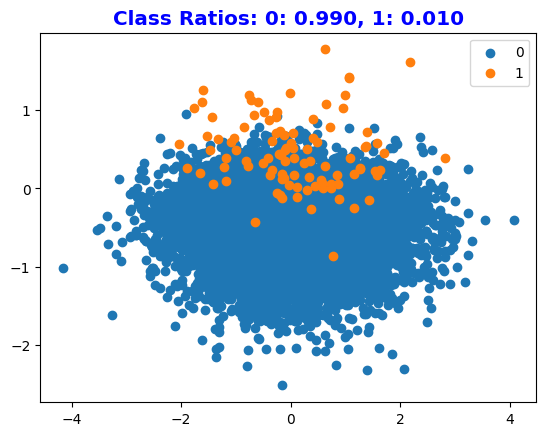

Après oversampling: Counter({0: 9900, 1: 9900})


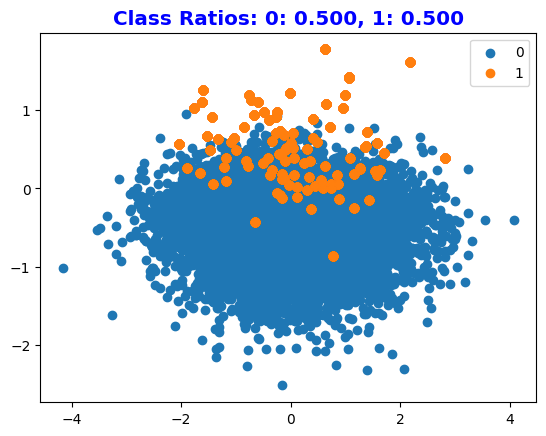

In [27]:
from imblearn.over_sampling import RandomOverSampler


# summarize class distribution
print("Données d'origine:", Counter(y))
# plot distribution
plot_dataset(X, y)
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print("Après oversampling:", Counter(y_over))
plot_dataset(X_over, y_over)

☝️ Le graphe **ne change pas** puisque l'oversampling **duplique des points existants**.

### Dans un Pipeline

👉 **Cette transformation peut être utilisée dans le cadre d'un pipeline pour s'assurer qu'elle n'est appliquée qu'à l'ensemble de données de formation dans le cadre d'une cross-validation**.

☝️ **Un pipeline scikit-learn ne peut pas être utilisé ; à la place, un pipeline de la bibliothèque `imbalanced-learn` peut être utilisé.**

```python
# pipeline
from imblearn.pipeline import Pipeline  # alternativement make_pipeline

steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=step)
```

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline


# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print(f'F-measure: {score:.3f}')

F-measure: 0.988


## Undersampling (*sous-échantillonnage*)

### Motivations

> 👉 Cette approche peut être plus appropriée pour les ensembles de données où **il y a un déséquilibre entre les classes, bien qu'il y ait encore un nombre suffisant d'exemples dans la classe minoritaire**.

### Limites

> ☝️ L'une des limites du sous-échantillonnage est que **les exemples de la classe majoritaire qui sont supprimés peuvent être utiles, importants, voire critiques pour l'établissement d'une frontière de décision robuste.**.
>
> Étant donné que les exemples sont supprimés de manière aléatoire, **il n'y a aucun moyen de détecter ou de préserver les bons exemples ou les exemples plus riches en informations de la classe majoritaire**.

### Implémentation Basique

La technique de sous-échantillonnage aléatoire peut être mise en œuvre à l'aide de la classe `RandomUnderSampler`.

Cette classe peut être utilisée de la même manière que la classe `RandomOverSampler` de la section précédente, **sauf que les stratégies ont un impact sur la classe majoritaire et non sur la classe minoritaire**.

```python
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
```

```python
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
```

Données d'origine: Counter({0: 9900, 1: 100})


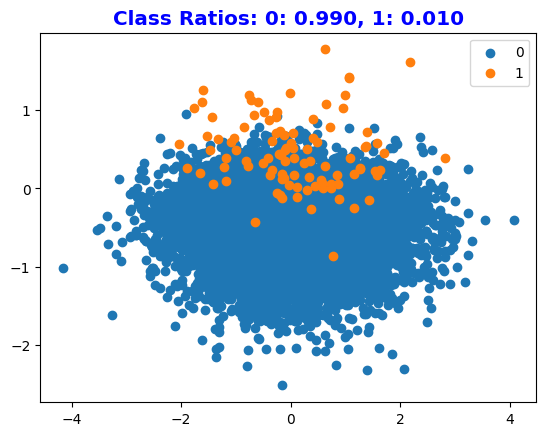

Après undersampling: Counter({0: 100, 1: 100})


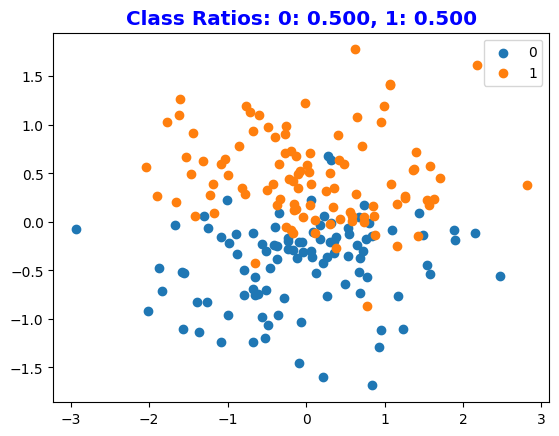

In [25]:
from imblearn.under_sampling import RandomUnderSampler


# summarize class distribution
print("Données d'origine:", Counter(y))
# plot distribution
plot_dataset(X, y)
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print("Après undersampling:", Counter(y_under))
# plot distribution
plot_dataset(X_under, y_under)

### Dans un Pipeline

Similairement à la section précédente...

In [31]:
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print(f'F-measure: {score:.3f}')

F-measure: 0.827


## Oversampling Elaboré: *SMOTE*

### Principe et Motivations

Une approche pour traiter les ensembles de données déséquilibrés consiste à suréchantillonner la classe minoritaire.

Comme nous venons de le voir, l'approche la plus simple consiste à dupliquer les exemples de la classe minoritaire, bien que ces exemples n'ajoutent pas de nouvelles informations au modèle.

Au lieu de cela, **de nouveaux exemples peuvent être synthétisés à partir des exemples existants**.

👉 Il s'agit d'un **type d'augmentation des données (*Data Augmentation*) pour la classe minoritaire**, appelé ***SMOTE*** (Synthetic Minority Oversampling TEchnique)

```python
# Implémentation
from imblearn.over_sampling import SMOTE
```

### *SMOTE* pour Equilibrer la Donnée

In [39]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#### Sans *SMOTE*

Counter({0: 9900, 1: 100})


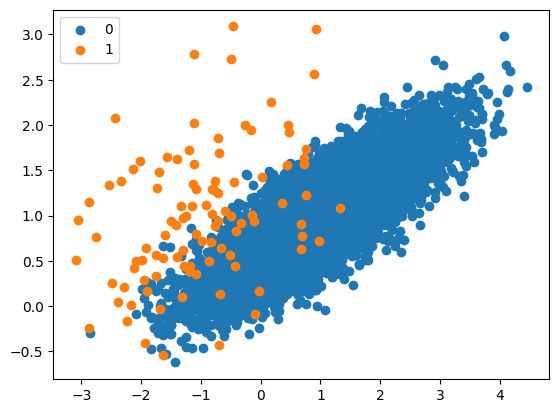

In [40]:
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend(loc="best")
plt.show()

#### Avec *SMOTE*

Données originelles: Counter({0: 9900, 1: 100})
Données après SMOTE: Counter({0: 9900, 1: 9900})


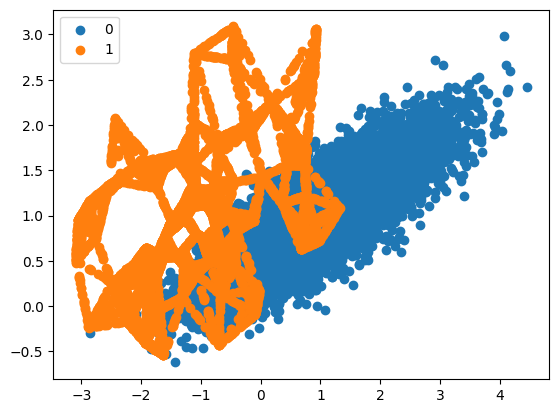

In [41]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y)
print("Données originelles:", counter)
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_smote)
print("Données après SMOTE:", counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y_smote == label)[0]
	plt.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
plt.legend(loc="best")
plt.show()

### *SMOTE* pour la Classification

#### Sans *SMOTE*

In [42]:
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC AUC: {np.mean(scores):.3f}')

Mean ROC AUC: 0.771


#### Avec *SMOTE*

In [43]:
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean ROC AUC: {np.mean(scores):3f}')

Mean ROC AUC: 0.814848


### Quelques Hyperparamètres

👉 Vous pourriez envisager de **tester différents ratios entre la classe minoritaire et la classe majoritaire** (par exemple, en modifiant l'argument `sampling_strategy`) pour voir s'il est possible d'améliorer encore les performances.

👉 Un autre domaine à explorer consisterait à **tester différentes valeurs des $k$-voisins les plus proches sélectionnés dans la procédure *SMOTE* lors de la création de chaque nouvel exemple synthétique**.

La valeur par défaut est $k = 5$, mais des valeurs plus grandes ou plus petites influenceront les types d'exemples créés et, à leur tour, pourront avoir un impact sur la performance du modèle.

In [44]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	pipeline = Pipeline(steps=[('over', over), ('model', model)])
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print(f'> k={k}, Mean ROC AUC: {score:.3f}')

> k=1, Mean ROC AUC: 0.762
> k=2, Mean ROC AUC: 0.791
> k=3, Mean ROC AUC: 0.796
> k=4, Mean ROC AUC: 0.799
> k=5, Mean ROC AUC: 0.822
> k=6, Mean ROC AUC: 0.819
> k=7, Mean ROC AUC: 0.813


## *SMOTE* avec Génération Sélective d'Echantillons

Dans cette section, nous examinerons certaines extensions de SMOTE qui sont **plus sélectives en ce qui concerne les exemples de la classe minoritaire qui servent de base à la génération de nouveaux exemples synthétiques**.

### Motivations

Une extension populaire de SMOTE consiste à **sélectionner les instances de la classe minoritaire qui sont mal classées**, comme dans le cas d'un modèle de classification par *kNN*.

Ces exemples mal classés sont probablement ambigus et se situent à la limite de la frontière de décision où l'appartenance à une classe peut se chevaucher.

C'est pourquoi cette modification de *SMOTE* est appelée *Borderline-SMOTE*.